In [1]:
import comet_ml
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from comet_ml.query import Tag
from comet_ml.query import Parameter 
from comet_ml import API

In [3]:
ssim_80_100 = [0.967515743939267, 0.9687557324557136, 0.9669578957653804, 0.962395720684392, 0.9606918468393129, 0.9611008882470565, 0.9529345449338008, 0.9530650679058612, 0.9517803397609966, 0.9486971664215711, 0.9410399147152693, 0.9380063447914849, 0.9321481132470175, 0.9220180251923433, 0.9106874133398005, 0.9034021484710146, 0.8889643339328284, 0.8525649582947236, 0.8357689693500386, 0.8022968795132579, 0.7894647222120885]
psnr_80_100 = [34.97024318665102, 34.800111610811285, 34.48954017874081, 34.17896874667034, 33.93319616003234, 33.5866396825962, 33.24008320516006, 32.92898943408886, 32.495198101057895, 32.05751532802537, 31.619832554992836, 31.105183123518863, 31.105183123518863, 29.927258975787367, 29.30888107056114, 28.50882548364738, 27.54125169685044, 26.428370027246412, 25.10355449081739, 23.77581300401014, 23.504576096513773]
mae_80_100 = [0.04026243949447116, 0.04048376993699204, 0.04216506596940238, 0.0442760724061518, 0.04546239908834985, 0.04656954454684539, 0.04958480106396505, 0.05128708212279594, 0.05344312602534067, 0.05565524741374717, 0.059943011445803086, 0.06300924257476515, 0.06710994081336902, 0.0731026975004686, 0.07893767044018017, 0.08581465526432157, 0.09649730950409421, 0.11233267544728455, 0.13010193441992318, 0.152110800726075, 0.15591267413373008]
rmse_80_100 = [0.03195331529874378, 0.032532360485666954, 0.033674605067223355, 0.03493167933126347, 0.03591571993531702, 0.03707387748135175, 0.038769737289808, 0.040254473270638025, 0.04214066600924086, 0.04386096926266925, 0.04666028773511961, 0.04933718032933019, 0.05237304662862558, 0.05632823810132641, 0.06060676744683783, 0.06624535164180581, 0.07396751539695219, 0.08403920443601473, 0.09808066296512104, 0.1144582801123211, 0.11811195266416792]

In [4]:
api = API(api_key="VaG6pF4qhcqKJOux0daNkIz2C")
models = ["x3d_m"]
top1acc_list = []

acc_len = 0
top1_80_100_list = []
for i in range(80, 101):
    compression_rate = i
    # print(compression_rate)
    tagged = Tag("top1,5_ver.11")
    compression_rate_params = Parameter('compression')
    model_name = Parameter('model')
    query = ((compression_rate_params == compression_rate) & (model_name == "x3d_m") & tagged)
    experiments = api.query("ohtani", "jpeg-compression", query)
    top1_list = experiments[0].get_metrics("validate_acc1")
    # top1_list = experiments[0].get_metrics("validate_acc5")
    top1_score = float(top1_list[0].get("metricValue"))
    top1_80_100_list.append(top1_score)



        

In [15]:
a, b = np.polyfit(mae_80_100, top1_80_100_list, 1)

In [16]:
a

-338.6589844261802

In [17]:
b

76.4665641454595

## MAE

slowfast_r101
slowfast_r50
x3d_m
x3d_s
x3d_xs
slow_r50


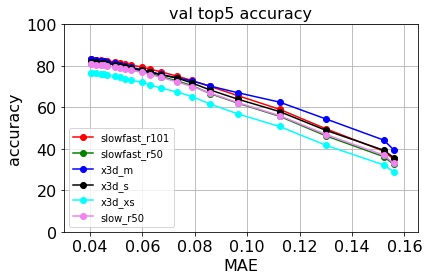

In [9]:
api = API(api_key="VaG6pF4qhcqKJOux0daNkIz2C")
models = ["slowfast_r101", "slowfast_r50", "x3d_m", "x3d_s", "x3d_xs", "slow_r50"]
top1acc_list = []

fig, ax = plt.subplots()
ax.set_xlabel('MAE')  # x軸ラベル
ax.set_ylabel('accuracy')  # y軸ラベル
# ax.set_title("val top1 accuracy") # グラフタイトル
ax.set_title("val top5 accuracy") # グラフタイトル
ax.grid()            # 罫線
ax.set_xlim(0.03, 0.165) # mae
ax.set_ylim(0, 100)
labels = list(range(80, 101))
colors = ["red", "green", "blue", "black" , "cyan" , "violet"]

for model in models:
    acc_len = 0
    print(model)
    model_list = str(model) + '_top1_80_100_list = []' 
    exec(model_list)
    for i in range(80, 101):
        compression_rate = i
        # print(compression_rate)
        tagged = Tag("top1,5_ver.11")
        compression_rate_params = Parameter('compression')
        model_name = Parameter('model')
        query = ((compression_rate_params == compression_rate) & (model_name == model) & tagged)
        experiments = api.query("ohtani", "jpeg-compression", query)
        # top1_list = experiments[0].get_metrics("validate_acc1")
        top1_list = experiments[0].get_metrics("validate_acc5")
        top1_score = top1_list[0].get("metricValue")
        model_top1_list_append = str(model) + '_top1_80_100_list.append(top1_score)' 
        exec(model_top1_list_append)

    model_top1_list_float_len = 'acc_len = len(' + str(model) + '_top1_80_100_list)' 
    exec(model_top1_list_float_len)
    for j in range(acc_len):
        model_top1_list_float = model + '_top1_80_100_list[j] = float(' + str(model) + '_top1_80_100_list[j])'
        exec(model_top1_list_float)
    top1acc_list_appen = 'top1acc_list.append(' + str(model) + '_top1_80_100_list)'
    exec(top1acc_list_appen)


    index = models.index(model)
    model_plt = "ax.plot(mae_80_100," + str(model) + "_top1_80_100_list, '-o', color=colors[index], label=model)"
    exec(model_plt)

parameters = {'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'axes.labelsize': 16,
        'axes.titlesize': 16,
        }
plt.rcParams.update(parameters) 
ax.legend(loc=0) 
fig.tight_layout()  # レイアウトの設定
# plt.savefig('/mnt/HDD10TB-2/ohtani/pytorchvideo/acc_fig/jpeg/img_score/val_top1acc_80_100_mae.pdf')
plt.savefig('/mnt/HDD10TB-2/ohtani/pytorchvideo/acc_fig/jpeg/img_score/val_top5acc_80_100_mae.pdf')
plt.show()

        

## PSNR

slowfast_r101
slowfast_r50
x3d_m
x3d_s
x3d_xs
slow_r50


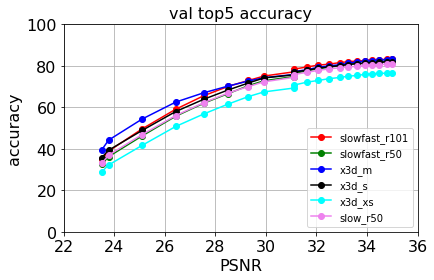

In [8]:
api = API(api_key="VaG6pF4qhcqKJOux0daNkIz2C")
models = ["slowfast_r101", "slowfast_r50", "x3d_m", "x3d_s", "x3d_xs", "slow_r50"]
top1acc_list = []

fig, ax = plt.subplots()
ax.set_xlabel('PSNR')  # x軸ラベル
ax.set_ylabel('accuracy')  # y軸ラベル
# ax.set_title("val top1 accuracy") # グラフタイトル
ax.set_title("val top5 accuracy") # グラフタイトル
ax.grid()            # 罫線
ax.set_xlim(22, 36) # psnr
ax.set_ylim(0, 100)
labels = list(range(80, 101))
colors = ["red", "green", "blue", "black" , "cyan" , "violet"]

for model in models:
    acc_len = 0
    print(model)
    model_list = str(model) + '_top1_80_100_list = []' 
    exec(model_list)
    for i in range(80, 101):
        compression_rate = i
        # print(compression_rate)
        tagged = Tag("top1,5_ver.11")
        compression_rate_params = Parameter('compression')
        model_name = Parameter('model')
        query = ((compression_rate_params == compression_rate) & (model_name == model) & tagged)
        experiments = api.query("ohtani", "jpeg-compression", query)
        # top1_list = experiments[0].get_metrics("validate_acc1")
        top1_list = experiments[0].get_metrics("validate_acc5")
        top1_score = top1_list[0].get("metricValue")
        model_top1_list_append = str(model) + '_top1_80_100_list.append(top1_score)' 
        exec(model_top1_list_append)

    model_top1_list_float_len = 'acc_len = len(' + str(model) + '_top1_80_100_list)' 
    exec(model_top1_list_float_len)
    for j in range(acc_len):
        model_top1_list_float = model + '_top1_80_100_list[j] = float(' + str(model) + '_top1_80_100_list[j])'
        exec(model_top1_list_float)
    top1acc_list_appen = 'top1acc_list.append(' + str(model) + '_top1_80_100_list)'
    exec(top1acc_list_appen)


    index = models.index(model)
    model_plt = "ax.plot(psnr_80_100," + str(model) + "_top1_80_100_list, '-o', color=colors[index], label=model)"
    exec(model_plt)

parameters = {'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'axes.labelsize': 16,
        'axes.titlesize': 16,
        }
plt.rcParams.update(parameters) 
ax.legend(loc=0) 
fig.tight_layout()  # レイアウトの設定
# plt.savefig('/mnt/HDD10TB-2/ohtani/pytorchvideo/acc_fig/jpeg/img_score/val_top1acc_80_100_psnr.pdf')
plt.savefig('/mnt/HDD10TB-2/ohtani/pytorchvideo/acc_fig/jpeg/img_score/val_top5acc_80_100_psnr.pdf')
plt.show()

        

## SSIM

slowfast_r101
slowfast_r50
x3d_m
x3d_s
x3d_xs
slow_r50


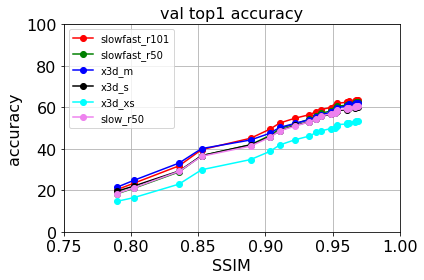

In [11]:
api = API(api_key="VaG6pF4qhcqKJOux0daNkIz2C")
models = ["slowfast_r101", "slowfast_r50", "x3d_m", "x3d_s", "x3d_xs", "slow_r50"]
top1acc_list = []

fig, ax = plt.subplots()
ax.set_xlabel('SSIM')  # x軸ラベル
ax.set_ylabel('accuracy')  # y軸ラベル
# ax.set_title("val top1 accuracy") # グラフタイトル
ax.set_title("val top5 accuracy") # グラフタイトル
ax.grid()            # 罫線
ax.set_xlim(0.75, 1.0) # ssim
ax.set_ylim(0, 100)
labels = list(range(80, 101))
colors = ["red", "green", "blue", "black" , "cyan" , "violet"]

for model in models:
    acc_len = 0
    print(model)
    model_list = str(model) + '_top1_80_100_list = []' 
    exec(model_list)
    for i in range(80, 101):
        compression_rate = i
        # print(compression_rate)
        tagged = Tag("top1,5_ver.11")
        compression_rate_params = Parameter('compression')
        model_name = Parameter('model')
        query = ((compression_rate_params == compression_rate) & (model_name == model) & tagged)
        experiments = api.query("ohtani", "jpeg-compression", query)
        # top1_list = experiments[0].get_metrics("validate_acc1")
        top1_list = experiments[0].get_metrics("validate_acc5")
        top1_score = top1_list[0].get("metricValue")
        model_top1_list_append = str(model) + '_top1_80_100_list.append(top1_score)' 
        exec(model_top1_list_append)

    model_top1_list_float_len = 'acc_len = len(' + str(model) + '_top1_80_100_list)' 
    exec(model_top1_list_float_len)
    for j in range(acc_len):
        model_top1_list_float = model + '_top1_80_100_list[j] = float(' + str(model) + '_top1_80_100_list[j])'
        exec(model_top1_list_float)
    top1acc_list_appen = 'top1acc_list.append(' + str(model) + '_top1_80_100_list)'
    exec(top1acc_list_appen)


    index = models.index(model)
    model_plt = "ax.plot(ssim_80_100," + str(model) + "_top1_80_100_list, '-o', color=colors[index], label=model)"
    exec(model_plt)

parameters = {'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'axes.labelsize': 16,
        'axes.titlesize': 16,
        }
plt.rcParams.update(parameters) 
ax.legend(loc=0) 
fig.tight_layout()  # レイアウトの設定
# plt.savefig('/mnt/HDD10TB-2/ohtani/pytorchvideo/acc_fig/jpeg/img_score/val_top1acc_80_100_ssim.pdf')
plt.savefig('/mnt/HDD10TB-2/ohtani/pytorchvideo/acc_fig/jpeg/img_score/val_top5acc_80_100_ssim.pdf')
plt.show()

        

## RMSE

In [ ]:
api = API(api_key="VaG6pF4qhcqKJOux0daNkIz2C")
models = ["slowfast_r101", "slowfast_r50", "x3d_m", "x3d_s", "x3d_xs", "slow_r50"]
top1acc_list = []

fig, ax = plt.subplots()
ax.set_xlabel('RMSE')  # x軸ラベル
ax.set_ylabel('accuracy')  # y軸ラベル
ax.set_title("val top1 accuracy") # グラフタイトル
# ax.set_title("val top5 accuracy") # グラフタイトル
ax.grid()            # 罫線
ax.set_xlim(0.02, 0.12) # rmse
ax.set_ylim(0, 100)
labels = list(range(80, 101))
colors = ["red", "green", "blue", "black" , "cyan" , "violet"]

for model in models:
    acc_len = 0
    print(model)
    model_list = str(model) + '_top1_80_100_list = []' 
    exec(model_list)
    for i in range(80, 101):
        compression_rate = i
        # print(compression_rate)
        tagged = Tag("top1,5_ver.11")
        compression_rate_params = Parameter('compression')
        model_name = Parameter('model')
        query = ((compression_rate_params == compression_rate) & (model_name == model) & tagged)
        experiments = api.query("ohtani", "jpeg-compression", query)
        top1_list = experiments[0].get_metrics("validate_acc1")
        # top1_list = experiments[0].get_metrics("validate_acc5")
        top1_score = top1_list[0].get("metricValue")
        model_top1_list_append = str(model) + '_top1_80_100_list.append(top1_score)' 
        exec(model_top1_list_append)

    model_top1_list_float_len = 'acc_len = len(' + str(model) + '_top1_80_100_list)' 
    exec(model_top1_list_float_len)
    for j in range(acc_len):
        model_top1_list_float = model + '_top1_80_100_list[j] = float(' + str(model) + '_top1_80_100_list[j])'
        exec(model_top1_list_float)
    top1acc_list_appen = 'top1acc_list.append(' + str(model) + '_top1_80_100_list)'
    exec(top1acc_list_appen)


    index = models.index(model)
    model_plt = "ax.plot(rmse_80_100," + str(model) + "_top1_80_100_list, '-o', color=colors[index], label=model)"
    exec(model_plt)

parameters = {'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'axes.labelsize': 16,
        'axes.titlesize': 16,
        }
plt.rcParams.update(parameters) 
ax.legend(loc=0) 
fig.tight_layout()  # レイアウトの設定
plt.savefig('/mnt/HDD10TB-2/ohtani/pytorchvideo/acc_fig/jpeg/img_score/val_top1acc_80_100_rmse.pdf')
# plt.savefig('/mnt/HDD10TB-2/ohtani/pytorchvideo/acc_fig/jpeg/img_score/val_top5acc_80_100_rmse.pdf')
plt.show()

        